<a href="https://colab.research.google.com/github/imadmlf/Meta_Heuristique/blob/main/EXMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Résolution du TSP avec  l’Algorithme génétique

Le problème du voyageur de commerce consiste à passer par un ensemble de villes en minimisant la distance totale du trajet.

In [80]:
 import numpy as np
 import matplotlib.pyplot as plt
 import random as rd

In [81]:
!pip install folium

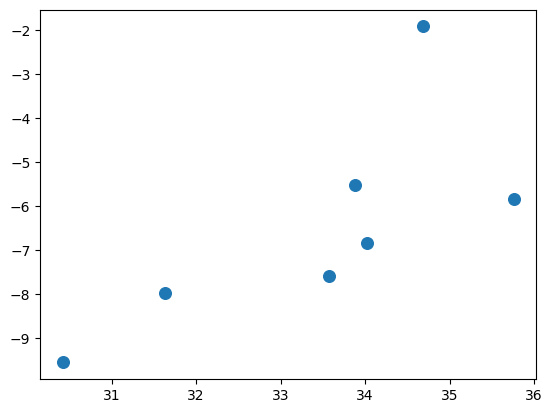

In [82]:
N = 7  # nombre de villes
M = 10  # dimension de la population

# Coordonnées des villes marocaines
cities = {
    'Casablanca': (33.5731, -7.5898),
    'Rabat': (34.0209, -6.8416),
    'Marrakech': (31.6295, -7.9811),
    'Tanger': (35.7595, -5.8330),
    'Agadir': (30.4220, -9.5595),
    'Meknès': (33.8869, -5.5155),
    'Oujda': (34.6814, -1.9086),
}

x = np.array([cities[city][0] for city in cities])
y = np.array([cities[city][1] for city in cities])

# Votre code pour l'algorithme génétique et la recherche du chemin optimal ici
chemin = np.arange(N)
plt.scatter(x,y,s=70)

In [83]:
import folium
# Créer une carte centrée sur le Maroc
map = folium.Map(location=[32, -6], zoom_start=6)

# Ajouter des marqueurs pour chaque ville
for city, coord in cities.items():
    folium.Marker(location=coord, popup=city).add_to(map)

# Afficher la carte
map

calcule de la fonction fitness

In [84]:
def fitness():
  global chemin, ch
  distance =0.0
  xy = np.column_stack((x[chemin], y[chemin]))
  distance = np.sum(np.sqrt(np.sum((xy - np.roll(xy, -1, axis=0))**2, axis=1)))
  return distance

determiner une population initiale

chromosome 1  [0, 3, 5, 2, 1, 6, 4] fitness 28.145735682572536
chromosome 2  [3, 4, 5, 1, 2, 0, 6] fitness 27.65757334829086
chromosome 3  [6, 2, 5, 4, 0, 1, 3] fitness 26.132347567756703
chromosome 4  [1, 6, 4, 2, 0, 3, 5] fitness 23.74051257223053
chromosome 5  [0, 2, 6, 4, 3, 5, 1] fitness 28.149323105514746
chromosome 6  [0, 5, 2, 1, 4, 3, 6] fitness 28.96745608595147
chromosome 7  [5, 2, 1, 6, 4, 0, 3] fitness 28.145735682572536
chromosome 8  [5, 1, 3, 0, 4, 2, 6] fitness 22.340609632416967
chromosome 9  [0, 6, 2, 1, 4, 5, 3] fitness 29.772913392692285
chromosome 10  [4, 5, 0, 6, 1, 2, 3] fitness 32.002489771179704


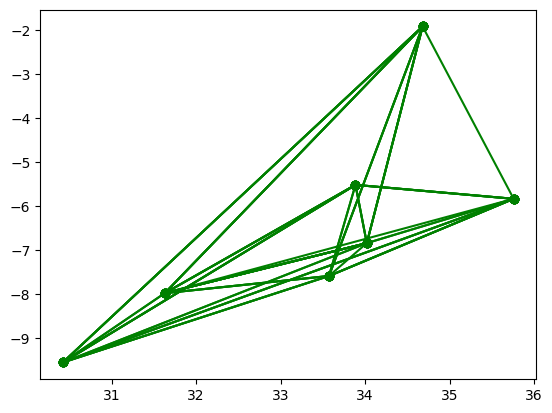

In [85]:
population = []

for i in range (0,M,1):
  population.append([0]*N)
  for j in range (0,N,1):
    h=1
    if j==0: element=rd.randint(0,N-1)
    else:
      while h==1:
        element=rd.randint(0,N-1)
        k=0
        for l in range (0,j,1):
          if population[i][l]==element:
            h=1
            k=k+1
        if k==0: h=0
    population[i][j]=element
    chemin[j]=population[i][j]
    d=fitness()
    folium.Marker([x[element], y[element]], icon=folium.Icon(color='green')).add_to(map)
  print('chromosome', i+1,'',population[i], 'fitness', d)
  plt.plot(x[chemin], y[chemin], marker='o', color='g')
  # Afficher le chemin sur la carte
  folium.PolyLine(locations=list(zip(x, y)), color='green').add_to(map)
map

chromosome 1  [5, 1, 3, 2, 6, 4, 0] fitness 29.36494985121636
chromosome 2  [0, 3, 5, 4, 2, 6, 1] fitness 24.66202369169035
chromosome 3  [1, 5, 3, 4, 2, 0, 6] fitness 24.477067464752615
chromosome 4  [5, 3, 6, 2, 1, 4, 0] fitness 25.738255953022346
chromosome 5  [5, 0, 6, 4, 1, 2, 3] fitness 30.356295257258125
chromosome 6  [1, 3, 2, 4, 0, 6, 5] fitness 23.18310520279142
chromosome 7  [3, 1, 6, 4, 0, 5, 2] fitness 29.555752871185717
chromosome 8  [2, 4, 0, 5, 3, 6, 1] fitness 21.39642894269472
chromosome 9  [2, 6, 1, 0, 3, 5, 4] fitness 24.66202369169035
chromosome 10  [2, 0, 5, 1, 3, 6, 4] fitness 22.237073442280398


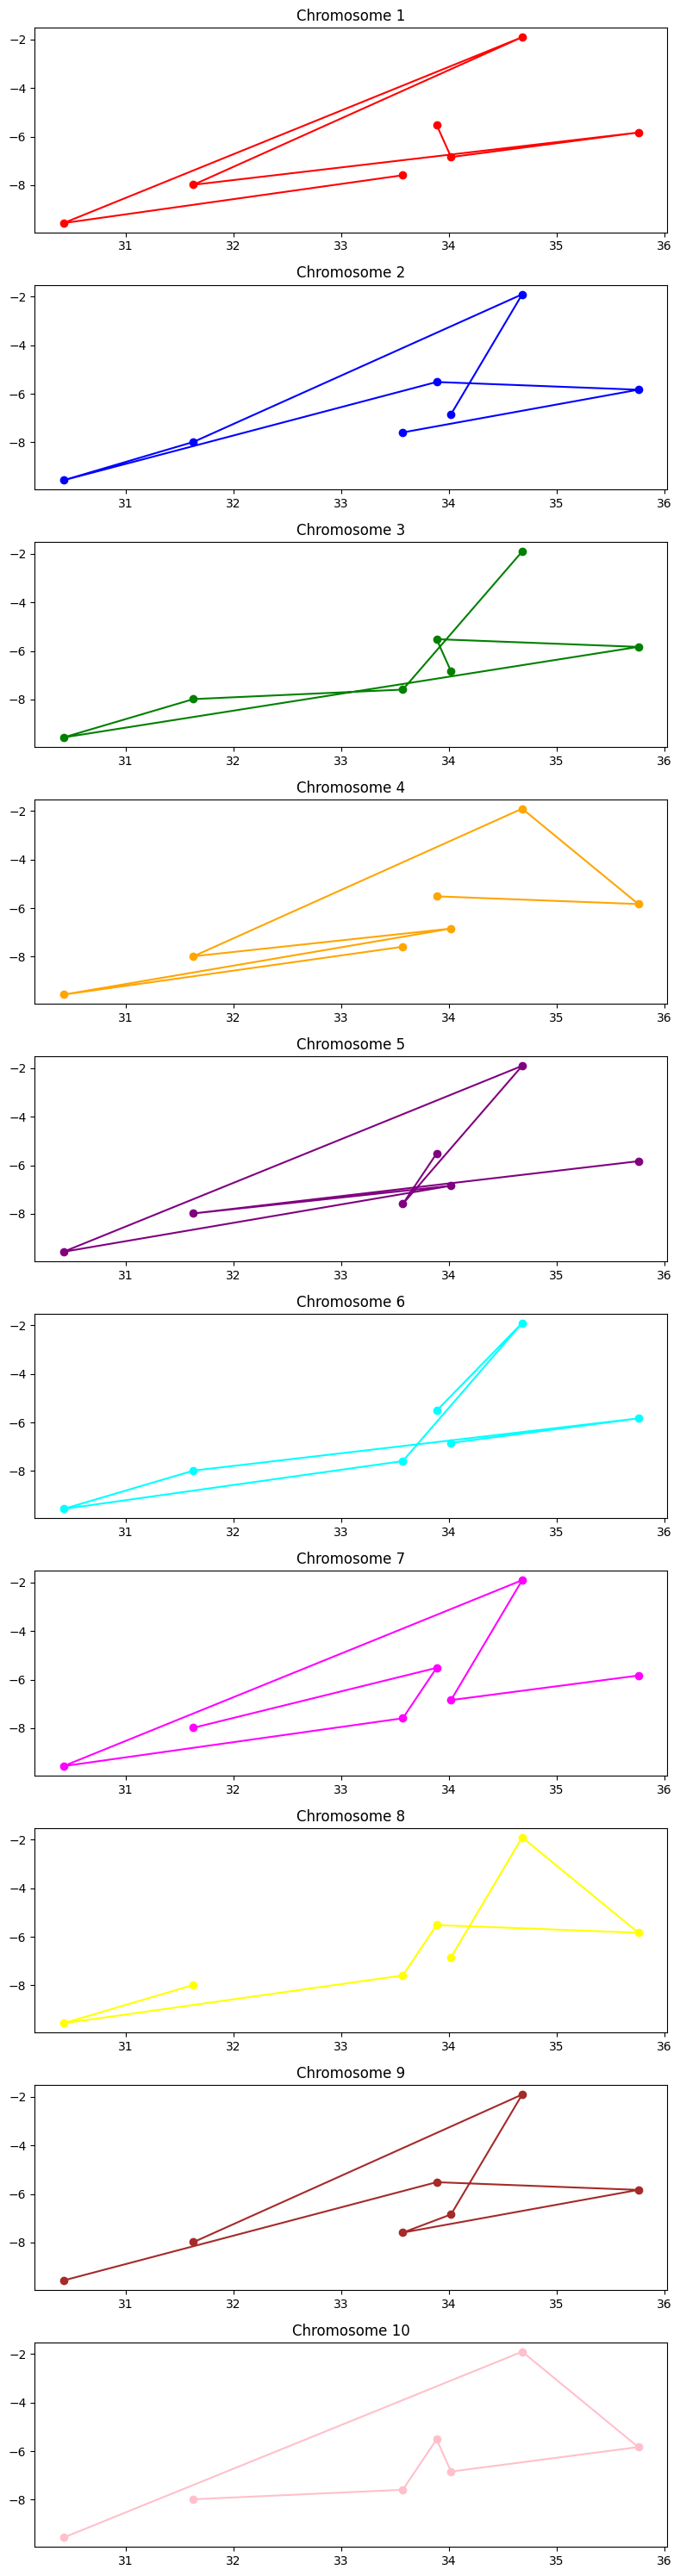

In [86]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']  # Define a list of colors
fig, axs = plt.subplots(M, 1, figsize=(8, 30))
for i in range(0, M, 1):
    population.append([0] * N)
    for j in range(0, N, 1):
        h = 1
        if j == 0:
            element = rd.randint(0, N - 1)
        else:
            while h == 1:
                element = rd.randint(0, N - 1)
                k = 0
                for l in range(0, j, 1):
                    if population[i][l] == element:
                        h = 1
                        k = k + 1
                if k == 0:
                    h = 0
        population[i][j] = element
        chemin[j] = population[i][j]
        d = fitness()

    print('chromosome', i + 1, '', population[i], 'fitness', d)


    axs[i].plot(x[chemin], y[chemin], marker='o', color=colors[i])
    axs[i].set_title(f'Chromosome {i+1}')

plt.tight_layout()
plt.show()

In [87]:
def longueur (x,y, ordre):
    i = ordre[-1]
    x0,y0 = x[i], y[i]
    d = 0
    for o in ordre:
        x1,y1 = x[o], y[o]
        d += (x0-x1)**2 + (y0-y1)**2
        x0,y0 = x1,y1
    return d

ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))


longueur initiale 147.32931259999998


In [88]:

def permutation(x,y,ordre):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 :
        it += 1
        print("iteration",it, "d=",d, "ordre[0]", ordre[0])
        d0 = d
        for i in range(1,len(ordre)-1) :  # on part de 1 et plus de 0, on est sûr que le premier noeud ne bouge pas
            for j in range(i+2,len(ordre)):
                r = ordre[i:j].copy()
                r.reverse()
                ordre2 = ordre[:i] + r + ordre[j:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre
ordre = permutation (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))

iteration 2 d= 147.32931259999998 ordre[0] 0
iteration 3 d= 79.56856744000001 ordre[0] 0
longueur min 79.56856744000001


Text(34.6814, -1.9086, 'F')

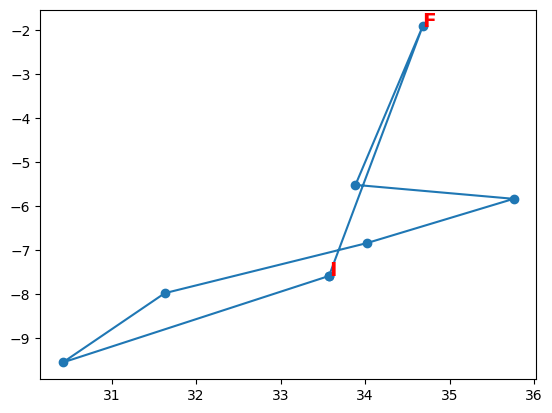

In [89]:

xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"I",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"F",color="r",weight="bold",size="x-large")

In [90]:

# Coordonnées des points du chemin
points = [(latitude, longitude) for latitude, longitude in zip(xo, yo)]

# Créer une carte Folium centrée sur le premier point du chemin
mymap = folium.Map(location=[xo[0], yo[0]], zoom_start=12)

# Tracer la ligne reliant les points du chemin
folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(mymap)

# Ajouter des marqueurs pour chaque point du chemin
for point in points:
    folium.Marker(location=point).add_to(mymap)

# Ajouter des étiquettes aux points de départ et d'arrivée
folium.Marker(location=points[0], popup="I", icon=folium.Icon(color='red')).add_to(mymap)
folium.Marker(location=points[-2], popup="F", icon=folium.Icon(color='red')).add_to(mymap)

# Afficher la carte
mymap

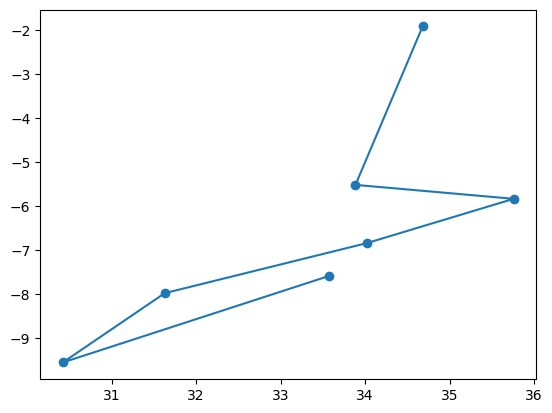

In [91]:
xo = [ x[o] for o in ordre]
yo = [ y[o] for o in ordre]
plt.plot(xo,yo, "o-")

In [92]:

# Coordonnées des points du chemin
points = [(latitude, longitude) for latitude, longitude in zip(xo, yo)]

# Créer une carte Folium centrée sur le premier point du chemin
mymap = folium.Map(location=[xo[0], yo[0]], zoom_start=12)

# Tracer la ligne reliant les points du chemin
folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(mymap)

# Ajouter des marqueurs pour chaque point du chemin
for point in points:
    folium.Marker(location=point).add_to(mymap)

# Ajouter des étiquettes aux points de départ et d'arrivée
folium.Marker(location=points[0], popup="I", icon=folium.Icon(color='red')).add_to(mymap)
folium.Marker(location=points[-1], popup="F", icon=folium.Icon(color='red')).add_to(mymap)

# Afficher la carte
mymap